In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

type(data)



dict

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11022,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969284e+07,1.969284e+07,False,NaN,1,NaN,NaN,None,2024-05-02T01:38:00.000Z,56947.761648,4.901167e+10,29.4418,-1.392802,-5.488184,-11.678824,-18.059705,-7.947705,31.993377,1.121463e+12,52.1544,1.195903e+12,None,2024-05-02T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 21:47:43.431756
1,1027,Ethereum,ETH,ethereum,8890,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220589e+08,1.220589e+08,True,NaN,2,NaN,NaN,None,2024-05-02T01:37:00.000Z,2905.793893,1.972299e+10,7.7707,-1.524113,-3.377839,-8.193107,-16.901243,-15.256174,25.771739,3.546780e+11,16.4946,3.546780e+11,None,2024-05-02T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 21:47:43.431756
2,825,Tether USDt,USDT,tether,84531,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.105957e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-02T01:36:00.000Z,0.998895,7.668811e+10,15.5673,0.003917,0.003379,-0.096332,-0.151531,-0.173215,-0.088871,1.104736e+11,5.1081,1.129616e+11,None,2024-05-02T01:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-01 21:47:43.431756
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475877e+08,1.475877e+08,False,NaN,4,NaN,NaN,None,2024-05-02T01:37:00.000Z,550.406453,1.449819e+09,-16.7443,-1.531387,-4.025291,-9.354775,-4.627147,34.125648,82.647166,8.123321e+10,3.7688,8.123321e+10,None,2024-05-02T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 21:47:43.431756
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.472231e+08,5.750733e+08,True,NaN,5,NaN,NaN,None,2024-05-02T01:36:00.000Z,130.275514,4.124976e+09,19.2424,-1.393989,2.846704,-12.307064,-31.438891,-0.134909,31.917459,5.826222e+10,2.6934,7.491797e+10,None,2024-05-02T01:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 21:47:43.431756
5,3408,USDC,USDC,usd-coin,18812,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.299704e+10,3.299704e+10,False,NaN,6,NaN,NaN,None,2024-05-02T01:36:00.000Z,1.000000,9.364292e+09,9.7632,-0.015240,0.004090,-0.026802,0.009124,0.006010,-0.019621,3.299706e+10,1.5257,3.299706e+10,None,2024-05-02T01:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-01 21:47:43.431756
6,52,XRP,XRP,xrp,1310,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-02T01:38:00.000Z,0.513856,1.732818e+09,26.5028,-0.395365,2.764164,-3.053714,-16.026332,-18.939291,1.854594,2.844664e+10,1.3229,5.138559e+10,None,2024-05-02T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 21:47:43.431756
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.441189e+11,1.441189e+11,True,NaN,8,NaN,NaN,None,2024-05-02T01:38:00.000Z,0.125627,2.101158e+09,52.0844,-1.847845,-4.139574,-17.707662,-38.467705,-10.381440,58.231668,1.810518e+10,0.8400,1.810518e+10,None,2024-05-02T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 21:47:43.431756
8,11419,Toncoin,TON,toncoin,308,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",N

In [14]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r"C:\Users\radom\Documents\API.csv"):
        df.to_csv(r"C:\Users\radom\Documents\API.csv", header='column_names')
    else:
        df.to_csv(r"C:\Users\radom\Documents\API.csv",mode='a',header=False)
        

In [13]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

API Runner completed successfully


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r"C:\Users\radom\Documents\API.csv")
df72

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11022,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969284e+07,1.969284e+07,False,NaN,1,NaN,NaN,None,2024-05-02T02:44:00.000Z,57276.316447,4.941712e+10,31.2893,0.348680,-4.272619,-10.843774,-14.283085,-7.325743,32.904123,1.127933e+12,52.4844,1.202803e+12,None,2024-05-02T02:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 22:44:58.332560
1,1027,Ethereum,ETH,ethereum,8890,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220589e+08,1.220589e+08,True,NaN,2,NaN,NaN,None,2024-05-02T02:43:00.000Z,2910.433073,1.988702e+10,10.3162,0.368445,-2.521335,-7.739398,-12.867153,-14.878910,26.418682,3.552443e+11,16.5299,3.552443e+11,None,2024-05-02T02:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 22:44:58.332560
2,825,Tether USDt,USDT,tether,84533,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.105957e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-02T02:43:00.000Z,0.999087,7.744947e+10,17.5489,0.001582,0.038618,-0.069915,-0.138774,-0.149055,-0.067384,1.104948e+11,5.1414,1.129833e+11,None,2024-05-02T02:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-01 22:44:58.332560
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475877e+08,1.475877e+08,False,NaN,4,NaN,NaN,None,2024-05-02T02:43:00.000Z,545.857672,1.482888e+09,-16.0105,-0.902516,-4.150717,-10.183433,-2.109695,33.269082,80.603726,8.056186e+10,3.7487,8.056186e+10,None,2024-05-02T02:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 22:44:58.332560
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.472231e+08,5.750733e+08,True,NaN,5,NaN,NaN,None,2024-05-02T02:43:00.000Z,128.765805,4.103130e+09,18.2945,-0.823074,2.666680,-11.920492,-29.735749,-0.122927,30.369711,5.758704e+10,2.6796,7.404978e+10,None,2024-05-02T02:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 22:44:58.332560
5,3408,USDC,USDC,usd-coin,18813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.299704e+10,3.299704e+10,False,NaN,6,NaN,NaN,None,2024-05-02T02:43:00.000Z,1.000086,9.436977e+09,11.9359,0.008150,0.026742,0.017121,0.044396,0.003177,-0.021433,3.299988e+10,1.5355,3.299988e+10,None,2024-05-02T02:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-01 22:44:58.332560
6,52,XRP,XRP,xrp,1310,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-02T02:44:00.000Z,0.508219,1.760074e+09,28.4605,-1.023410,1.449294,-3.365662,-14.292945,-19.359336,0.441250,2.813457e+10,1.3091,5.082188e+10,None,2024-05-02T02:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 22:44:58.332560
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.441189e+11,1.441189e+11,True,NaN,8,NaN,NaN,None,2024-05-02T02:44:00.000Z,0.125403,2.096297e+09,51.2720,-0.190304,-3.565330,-17.032966,-34.506970,-9.810273,57.252217,1.807287e+10,0.8410,1.807287e+10,None,2024-05-02T02:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 22:44:58.332560
8,11419,Toncoin,TON,toncoin,308,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11022,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19692837.00000,19692837.00000,False,NaN,1,NaN,NaN,None,2024-05-02T03:04:00.000Z,57499.92531,49470804272.85526,31.26940,0.44318,-4.07692,-10.64903,-14.26569,-6.99788,33.47160,1132336656612.80249,52.58830,1207498431478.86011,None,2024-05-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 23:04:42.128660
1,1027,Ethereum,ETH,ethereum,8890,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122058901.79278,122058901.79278,True,NaN,2,NaN,NaN,None,2024-05-02T03:03:00.000Z,2919.08206,20001650551.62878,10.85510,0.35209,-2.37115,-7.61561,-13.26118,-14.57908,26.82811,356299950048.44714,16.54500,356299950048.45001,None,2024-05-02T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 23:04:42.128660
2,825,Tether USDt,USDT,tether,84533,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110595728040.53976,113086550461.58789,True,NaN,3,NaN,NaN,None,2024-05-02T03:03:00.000Z,0.99907,77536278587.24809,17.48230,0.00650,0.02321,-0.06902,-0.16273,-0.14178,-0.06762,110492847714.83568,5.13080,112981353078.74001,None,2024-05-02T03:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-01 23:04:42.128660
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587674.23282,147587674.23282,False,NaN,4,NaN,NaN,None,2024-05-02T03:03:00.000Z,547.56627,1475011305.35611,-17.01850,0.73489,-4.13769,-9.78336,-2.50991,33.55904,81.10251,80814032667.36568,3.75320,80814032667.37000,None,2024-05-02T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 23:04:42.128660
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447223102.47399,575073310.62000,True,NaN,5,NaN,NaN,None,2024-05-02T03:03:00.000Z,129.61374,4116840034.65633,18.78340,-0.10700,3.62707,-11.61078,-30.19661,0.29706,30.52096,57966256716.19766,2.69210,74537399722.03000,None,2024-05-02T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 23:04:42.128660
5,3408,USDC,USDC,usd-coin,18813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32997042164.35519,32997042164.35519,False,NaN,6,NaN,NaN,None,2024-05-02T03:03:00.000Z,1.00016,9432889011.46725,11.68320,0.01532,0.02344,0.01758,0.02824,0.01313,-0.00023,33002186911.26640,1.53270,33002186911.27000,None,2024-05-02T03:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-01 23:04:42.128660
6,52,XRP,XRP,xrp,1310,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,None,2024-05-02T03:04:00.000Z,0.50986,1760389940.05472,27.99270,-0.40985,1.80439,-3.50920,-15.01925,-19.20966,0.63142,28225188479.60213,1.31070,50985564282.00000,None,2024-05-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-01 23:04:42.128660
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144118886383.70526,144118886383.70526,True,NaN,8,NaN,NaN,None,2024-05-02T03:04:00.000Z,0.12616,2091576656.63716,50.23560,0.33002,-3.42187,-16.82329,-34.35821,-9.24080,58.24920,18181910762.48229,0.84440,18181910762.48000,None,2024-05-02T03:04:00.000

In [32]:
#looking at coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.44318,-4.07692,-10.64903,-14.26569,-6.99788,33.47160
Ethereum,0.35209,-2.37115,-7.61561,-13.26118,-14.57908,26.82811
Tether USDt,0.00650,0.02321,-0.06902,-0.16273,-0.14178,-0.06762
BNB,0.73489,-4.13769,-9.78336,-2.50991,33.55904,81.10251
Solana,-0.10700,3.62707,-11.61078,-30.19661,0.29706,30.52096
USDC,0.01532,0.02344,0.01758,0.02824,0.01313,-0.00023
XRP,-0.40985,1.80439,-3.50920,-15.01925,-19.20966,0.63142
Dogecoin,0.33002,-3.42187,-16.82329,-34.35821,-9.24080,58.24920
Toncoin,0.59258,-5.99899,-14.01097,-7.55105,76.36237,126.66380


In [33]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.44318
              quote.USD.percent_change_24h    -4.07692
              quote.USD.percent_change_7d    -10.64903
              quote.USD.percent_change_30d   -14.26569
              quote.USD.percent_change_60d    -6.99788
              quote.USD.percent_change_90d    33.47160
Ethereum      quote.USD.percent_change_1h      0.35209
              quote.USD.percent_change_24h    -2.37115
              quote.USD.percent_change_7d     -7.61561
              quote.USD.percent_change_30d   -13.26118
              quote.USD.percent_change_60d   -14.57908
              quote.USD.percent_change_90d    26.82811
Tether USDt   quote.USD.percent_change_1h      0.00650
              quote.USD.percent_change_24h     0.02321
              quote.USD.percent_change_7d     -0.06902
              quote.USD.percent_change_30d    -0.16273
              quote.USD.percent_change_60d    -0.14178
              quote.US

In [20]:
type(df4)

pandas.core.series.Series

In [34]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.44318
             quote.USD.percent_change_24h  -4.07692
             quote.USD.percent_change_7d  -10.64903
             quote.USD.percent_change_30d -14.26569
             quote.USD.percent_change_60d  -6.99788
             quote.USD.percent_change_90d  33.47160
Ethereum     quote.USD.percent_change_1h    0.35209
             quote.USD.percent_change_24h  -2.37115
             quote.USD.percent_change_7d   -7.61561
             quote.USD.percent_change_30d -13.26118
             quote.USD.percent_change_60d -14.57908
             quote.USD.percent_change_90d  26.82811
Tether USDt  quote.USD.percent_change_1h    0.00650
             quote.USD.percent_change_24h   0.02321
             quote.USD.percent_change_7d   -0.06902
             quote.USD.percent_change_30d  -0.16273
             quote.USD.percent_change_60d  -0.14178
             quote.USD.percent_change_90d  -0.06762
BNB          quote.USD.percent_change_1h    0.73489
             quote.USD.percent_change_24h  -4.13769
             quote.USD.percent_change_7d   -9.78336
             quote.USD.percent_change_30d  -2.50991
             quote.USD.percent_change_60d  33.55904
             quote.USD.percent_change_90d  81.10251
Solana       quote.USD.percent_change_1h   -0.10700
             quote.USD.percent_change_24h   3.62707
             quote.USD.percent_change_7d  -11.61078
             quote.USD.percent_change_30d -30.19661
             quote.USD.percent_change_60d   0.29706
             quote.USD.percent_change_90d  30.52096
USDC         quote.USD.percent_change_1h    0.01532
             quote.USD.percent_change_24h   0.02344
             quote.USD.percent_change_7d    0.01758
             quote.USD.percent_change_30d   0.02824
             quote.USD.percent_change_60d   0.01313
             quote.USD.percent_change_90d  -0.00023
XRP          quote.USD.percent_change_1h   -0.40985
             quote.USD.percent_change_24h   1.80439
             quote.USD.percent_change_7d   -3.50920
             quote.USD.percent_change_30d -15.01925
             quote.USD.percent_change_60d -19.20966
             quote.USD.percent_change_90d   0.63142
Dogecoin     quote.USD.percent_change_1h    0.33002
             quote.USD.percent_change_24h  -3.42187
             quote.USD.percent_change_7d  -16.82329
             quote.USD.percent_change_30d -34.35821
             quote.USD.percent_change_60d  -9.24080
             quote.USD.percent_change_90d  58.24920
Toncoin      quote.USD.percent_change_1h    0.59258
             quote.USD.percent_change_24h  -5.99899
             quote.USD.percent_change_7d  -14.01097
             quote.USD.percent_change_30d  -7.55105
             quote.USD.percent_change_60d  76.36237
             quote.USD.percent_change_90d 126.66380
Cardano      quote.USD.percent_change_1h    0.41284
             quote.USD.percent_change_24h   1.25055
             quote.USD.percent_change_7d   -6.37515
             quote.USD.percent_change_30d -26.20220
             quote.USD.percent_change_60d -39.40034
             quote.USD.percent_change_90d -12.40056
Shiba Inu    quote.USD.percent_change_1h   -0.33315
             quote.USD.percent_change_24h  -0.15291
             quote.USD.percent_change_7d  -14.45744
             quote.USD.percent_change_30d -18.81378
             quote.USD.percent_change_60d  -1.94008
             quote.USD.percent_change_90d 141.70214
Avalanche    quote.USD.percent_change_1h   -0.02001
             quote.USD.percent_change_24h   0.79492
             quote.USD.percent_change_7d   -9.54351
             quote.USD.percent_change_30d -32.17119
             quote.USD.percent_change_60d -24.50413
             quote.USD.percent_change_90d  -4.80471
TRON         quote.USD.percent_change_1h   -0.09197
             quote.USD.percent_change_24h  -0.01998
             quote.USD.percent_change_7d    5.25081
             quote.USD.percent_change_30d

In [23]:
df5.count()

values    90
dtype: int64

In [36]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.44318
1,Bitcoin,quote.USD.percent_change_24h,-4.07692
2,Bitcoin,quote.USD.percent_change_7d,-10.64903
3,Bitcoin,quote.USD.percent_change_30d,-14.26569
4,Bitcoin,quote.USD.percent_change_60d,-6.99788
5,Bitcoin,quote.USD.percent_change_90d,33.47160
6,Ethereum,quote.USD.percent_change_1h,0.35209
7,Ethereum,quote.USD.percent_change_24h,-2.37115
8,Ethereum,quote.USD.percent_change_7d,-7.61561
9,Ethereum,quote.USD.percent_change_30d,-13.26118


In [37]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.44318
1,Bitcoin,quote.USD.percent_change_24h,-4.07692
2,Bitcoin,quote.USD.percent_change_7d,-10.64903
3,Bitcoin,quote.USD.percent_change_30d,-14.26569
4,Bitcoin,quote.USD.percent_change_60d,-6.99788
5,Bitcoin,quote.USD.percent_change_90d,33.47160
6,Ethereum,quote.USD.percent_change_1h,0.35209
7,Ethereum,quote.USD.percent_change_24h,-2.37115
8,Ethereum,quote.USD.percent_change_7d,-7.61561
9,Ethereum,quote.USD.percent_change_30d,-13.26118


In [40]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.44318
1,Bitcoin,24h,-4.07692
2,Bitcoin,7d,-10.64903
3,Bitcoin,30d,-14.26569
4,Bitcoin,60d,-6.99788
5,Bitcoin,90d,33.47160
6,Ethereum,quote.USD.percent_change_1h,0.35209
7,Ethereum,24h,-2.37115
8,Ethereum,7d,-7.61561
9,Ethereum,30d,-13.26118


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

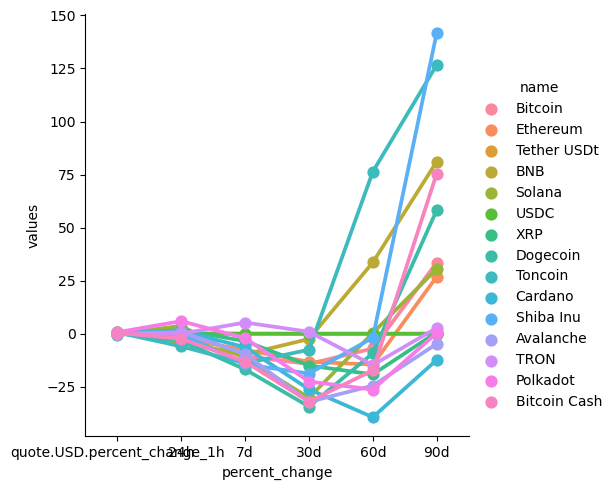

In [41]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [44]:
df8 = df[['name','quote.USD.price','Timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,Timestamp
0,Bitcoin,57499.92531,2024-05-01 23:04:42.128660
